<div class="alert alert-danger" role="alert">
    <span style="font-size:20px">&#9888;</span> <span style="font-size:16px">This is a read-only notebook! If you want to make and save changes, save a copy by clicking on <b>File</b> &#8594; <b>Save a copy</b>. If this is already a copy, you can delete this cell.</span>
</div>

<h1>Principal Component Analysis<span class="tocSkip"></span></h1>

This notebook provides a simple wrapper function to Sklearn's PCA algorithm: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

**The code for this template was adapted from SQUAD's Sphinx tool for Clustering analysis: https://owlabs.atlassian.net/wiki/spaces/SQUADSPHINX/overview**


<h2>Table of Contents<span class="tocSkip"></span></h2>
<ul class="toc-item"><li><span><a href="#Read-in-data" data-toc-modified-id="Read-in-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read in data</a></span></li><li><span><a href="#Run-PCA-analysis" data-toc-modified-id="Run-PCA-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Run PCA analysis</a></span><ul class="toc-item"><li><span><a href="#Extract-information-from-the-PCA-analysis" data-toc-modified-id="Extract-information-from-the-PCA-analysis-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Extract information from the PCA analysis</a></span></li></ul></li></ul>

**We begin by importing key libraries for data handling and exploration**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Developer's code to automatically update functions sourced in from the modules
%load_ext autoreload
%autoreload 2

# Add path of the folder 'resources' to the path from which we can import modules  
import sys
sys.path.append('../../utilities')

# Read in data

This dataset contains soccer player attributes from the FIFA soccer game.

In [21]:
# Load in the data
soccer_data = pd.read_csv("sample_input/soccer.csv")
soccer_data.head()

,player_api_id,player_name,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,fix_vision,fix_penalties,fix_marking,fix_standing_tackle,fix_sliding_tackle,fix_gk_diving,fix_gk_handling,fix_gk_kicking,fix_gk_positioning,fix_gk_reflexes
0,2625,"Patryk Rachwal,18",60.5,61.0,50.0,47.0,46.0,53.0,38.0,56.0,...,4.060606,15.060606,12.060606,12.060606,3.060606,-38.939394,-39.939394,-44.939394,-42.939394,-42.939394
1,2752,Diego Mainz,70.0,71.0,36.0,37.0,72.0,55.0,20.0,45.0,...,8.030303,-8.969697,30.030303,29.030303,21.030303,-32.969697,-37.969697,-36.969697,-34.969697,-28.969697
2,2768,Jose Dorado,72.0,73.0,42.0,42.0,69.0,68.0,28.0,39.0,...,9.090909,-22.909091,26.090909,25.090909,33.090909,-36.909091,-33.909091,-35.909091,-34.909091,-38.909091
3,2770,Ignacio Gonzalez,71.0,72.0,62.0,68.0,71.0,72.0,69.0,71.0,...,18.424242,14.424242,-21.575758,-11.575758,-29.575758,-42.575758,-41.575758,-48.575758,-40.575758,-39.575758
4,2790,Alberto Rey,71.0,76.0,71.0,37.0,55.0,68.0,43.0,64.0,...,2.242424,-3.757576,19.242424,19.242424,11.242424,-49.757576,-36.757576,13.242424,-36.757576,-36.757576


# Run PCA analysis

This generates the first 10 principal components. You can choose to standardize or not standardize the data (standardized is recommended if that data is not in similar scale). It also generates charts and results to a folder

Starting PCA algorithm
Saving PCA results


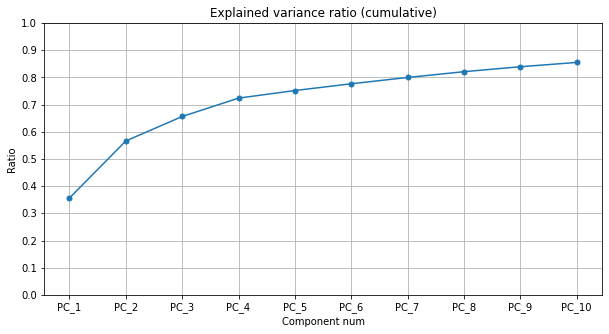

In [24]:
from dimensionality_reduction.synthetic_variable_reduction import run_pca

variables = [
    'fix_crossing', 'fix_short_passing', 'fix_finishing', 'fix_volleys', 'fix_heading_accuracy', 'fix_dribbling', 'fix_curve', 'fix_free_kick_accuracy',
    'fix_long_passing', 'fix_ball_control', 'fix_acceleration', 'fix_sprint_speed', 'fix_agility', 'fix_reactions', 'fix_balance', 'fix_shot_power', 'fix_jumping',
    'fix_stamina', 'fix_strength', 'fix_long_shots', 'fix_aggression', 'fix_interceptions', 'fix_positioning', 'fix_vision', 'fix_penalties', 'fix_marking',
    'fix_standing_tackle', 'fix_sliding_tackle', 'fix_gk_diving', 'fix_gk_handling', 'fix_gk_kicking', 'fix_gk_positioning', 'fix_gk_reflexes'
]

output = run_pca(
    data=soccer_data,
    variables=variables,
    n_components = 10,
    standardize_vars=True, 
    generate_charts=True,
    save_results_to_excel=True
)

## Extract information from the PCA analysis

**Starting with the variance explained**

In [26]:
output['explained_variance']

,Cumulative Variance,Marginal Variance,PCA_dim
0,0.356242,0.356242,PC_1
1,0.566318,0.210076,PC_2
2,0.656364,0.090046,PC_3
3,0.723938,0.067574,PC_4
4,0.751871,0.027934,PC_5
5,0.776741,0.024870,PC_6
6,0.799964,0.023223,PC_7
7,0.821198,0.021234,PC_8
8,0.839459,0.018261,PC_9
9,0.855246,0.015787,PC_10


**The tool also generates the Principal Components**

These can be used to represent the data in fewer dimensions

In [27]:
output["data"].head()

,pca_dim_0,pca_dim_1,pca_dim_2,pca_dim_3,pca_dim_4,pca_dim_5,pca_dim_6,pca_dim_7,pca_dim_8,pca_dim_9,...,fix_vision,fix_penalties,fix_marking,fix_standing_tackle,fix_sliding_tackle,fix_gk_diving,fix_gk_handling,fix_gk_kicking,fix_gk_positioning,fix_gk_reflexes
0,-0.591191,-1.616196,-0.806185,-0.882115,1.921418,0.684458,2.101902,0.451786,-0.860218,0.875791,...,4.060606,15.060606,12.060606,12.060606,3.060606,-38.939394,-39.939394,-44.939394,-42.939394,-42.939394
1,3.666860,-4.814296,2.566769,0.224006,-1.773300,0.474576,-0.265971,0.829759,-0.133746,0.528247,...,8.030303,-8.969697,30.030303,29.030303,21.030303,-32.969697,-37.969697,-36.969697,-34.969697,-28.969697
2,3.393693,-3.355063,-0.514452,-0.592350,-2.106219,1.368242,-2.121858,-0.193838,0.863151,-0.503993,...,9.090909,-22.909091,26.090909,25.090909,33.090909,-36.909091,-33.909091,-35.909091,-34.909091,-38.909091
3,-4.054611,1.081673,3.487481,-1.914149,0.459506,0.618675,-1.522706,-0.021067,0.072825,-0.347164,...,18.424242,14.424242,-21.575758,-11.575758,-29.575758,-42.575758,-41.575758,-48.575758,-40.575758,-39.575758
4,1.270287,-1.733558,-0.695641,-2.257514,0.393078,-1.019717,0.167625,1.005701,1.671334,-0.856745,...,2.242424,-3.757576,19.242424,19.242424,11.242424,-49.757576,-36.757576,13.242424,-36.757576,-36.757576
